In [1]:
# univariate lstm example
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras import optimizers

In [3]:
df = pd.read_csv("pc_0338.csv")

In [4]:
df = df['Product_Demand']

In [5]:
df

0      40
1      13
2      30
3      16
4       2
       ..
414     1
415     3
416     1
417    30
418     2
Name: Product_Demand, Length: 419, dtype: int64

In [6]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [7]:
# define input sequence
timeseries_data = df.to_numpy()
# choose a number of time steps
n_steps = 100
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [8]:
print(X),print(y)

[[40 13 30 ... 10  1  5]
 [13 30 16 ...  1  5  2]
 [30 16  2 ...  5  2  4]
 ...
 [ 5  3 20 ...  5  1  3]
 [ 3 20  1 ...  1  3  1]
 [20  1 24 ...  3  1 30]]
[  2   4   1   3   3   1   5   1   2   1   1   8   1   1   3   6   1   4
   1   2   1  50   2   5   2  50   1   4  11   8   3   2   1   9   2   2
   1  11   3   2   2   2   1   1   5   2   4   4   2   2   4   2   1   6
   4   2   1   1   2   1   8   5  50  50   2   2   2  10   1   1   1   1
  41   2   1  30   7   5 120  43   1  19  10   2   1   5   1   2   2   1
  10  50  11  12  30   2   3   1  50   1   1  10   2   1  10   1  35  30
   2   8   4   4   2  50 110   2   3   2  10  10   8   1   1   1   1  10
   1  30   5   4  10  30  22   2  50   1  10   1  10   1   3  10   2  10
   6  50   1   1   6   4   1   4  10   2   3   2   1   1  30   1  50   2
  10   2   2   1  50   2   2   5  31   1   2   2  12   1  10  50   1  10
  40  40  30   5  60  10  50   1  10   2   2   4   2   4   1   1  16   1
   1  10   1   2   5   1   2   1   4   1 

(None, None)

In [9]:
X.shape

(319, 100)

In [10]:
# choose a number of time steps
n_steps = 100
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 1
n_steps = 100
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

In [11]:
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1, activation='relu'))
adam = optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='mse')

In [12]:
# fit model
model.fit(X, y, epochs=150, verbose=1)

Train on 319 samples
Epoch 1/150
319/319 [==============================] - 3s 8ms/sample - loss: 434.0301
Epoch 2/150
319/319 [==============================] - 0s 1ms/sample - loss: 341.8168
Epoch 3/150
319/319 [==============================] - 0s 1ms/sample - loss: 340.2819
Epoch 4/150
319/319 [==============================] - 0s 1ms/sample - loss: 326.4237
Epoch 5/150
319/319 [==============================] - 0s 1ms/sample - loss: 314.8747
Epoch 6/150
319/319 [==============================] - 0s 1ms/sample - loss: 301.5626
Epoch 7/150
319/319 [==============================] - 0s 1ms/sample - loss: 290.8851
Epoch 8/150
319/319 [==============================] - 0s 1ms/sample - loss: 274.0552
Epoch 9/150
319/319 [==============================] - 0s 1ms/sample - loss: 262.6925
Epoch 10/150
319/319 [==============================] - 0s 1ms/sample - loss: 248.0037
Epoch 11/150
319/319 [==============================] - 0s 1ms/sample - loss: 234.0010
Epoch 12/150
319/319 [=========

In [13]:
model.save("model0338.h5")

In [14]:
timeseries_data = timeseries_data.astype(float)
x_input=timeseries_data[-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [15]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [16]:
# demonstrate prediction for next 10 days
#temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[0.]
1 day input [ 24.  30.   2.  30.   2.   1.   2.  20.  96.   9.  20.   4.   2.   1.
   2.   1.  20.  62.   3.  20.  50.   3.   2.   1.  20.   1.  10.   2.
   4.   3.   3.   2.  20.   1.  17.  10.   2.  21.  20.  56.  50.  36.
  30.  72.  60.  16.  11.  50.  38.   8.   2.   2.  30.  54.   2.   3.
  20.   3.   5.  10.  10.  16.   2.  10.  30.   1.   1.   1.  19. 100.
  16.   1.  10.   2.  30.  30.   3.   1.  10.   6.  17.  10.   3.   1.
   3.  40.   1.   3.   2.  40.   2.  50.  60.   5.   1.   3.   1.  30.
   2.   0.]
1 day output [[32.362595]]
2 day input [ 30.          2.         30.          2.          1.          2.
  20.         96.          9.         20.          4.          2.
   1.          2.          1.         20.         62.          3.
  20.         50.          3.          2.          1.         20.
   1.         10.          2.          4.          3.          3.
   2.         20.          1.         17.         10.          2.
  21.         20.         56.         5

In [17]:
list2 = [1 if i == 0 else i for i in lst_output]

In [18]:
print(list2)

[1, 32.362595, 42.01922, 1, 1, 3.9113214, 23.21328, 1, 29.900665, 42.63124]


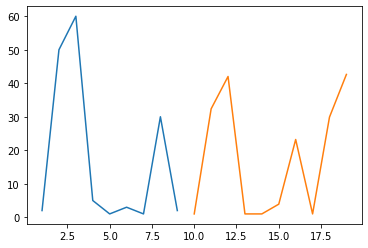

In [19]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries_data[-9:])
plt.plot(day_pred,list2)